In [16]:
import pandas as pd
import random

In [17]:
df = pd.read_excel('tmp1pro.xlsx')
df.head()

,MLSS,MLVSS,turbidity,train 1 TMP,mode,train 2 TMP,mode.1,train 3 TMP,mode.2,train 4 TMP,...,flows t 3,flows t 4,tds,total nitrogen,cod inf,cod enf,enf mgd,salinity inf,Unnamed: 30,Unnamed: 31
0,-0.280713,-0.162677,-0.889879,-1.599297,pro',0.650654,stb',-1.002140,pro',-0.454365,...,0.135955,-1.53908,NaN,NaN,NaN,NaN,0.052989,NaN,NaN,01-Jan-2020'
1,-1.072436,-0.884203,-0.858822,-0.955755,pro',-0.605422,pro',-0.739955,bkp',1.195036,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.364128,NaN,NaN,NaT'
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.879529,-0.708911,-0.905408,-1.017045,pro',-0.632434,pro',0.904660,bkp',0.598268,...,NaN,NaN,NaN,NaN,NaN,NaN,0.293710,NaN,NaN,NaT'


In [18]:
data = df.drop(df.columns[[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MLSS            301 non-null    float64
 1   MLVSS           301 non-null    float64
 2   turbidity       301 non-null    float64
 3   train 1 TMP     302 non-null    float64
 4   mode            302 non-null    object 
 5   train 2 TMP     302 non-null    float64
 6   mode.1          302 non-null    object 
 7   train 3 TMP     302 non-null    float64
 8   mode.2          302 non-null    object 
 9   train 4 TMP     302 non-null    float64
 10  mode.3          302 non-null    object 
 11  ph inff         302 non-null    float64
 12  bod inff        55 non-null     float64
 13  bod pe          52 non-null     float64
 14  bod eff         55 non-null     float64
 15  tss inf         49 non-null     float64
 16  tss enf         49 non-null     float64
 17  temp inf        302 non-null    flo

In [20]:
data = data.dropna(axis = 0, how = "any")
y = data['train 1 TMP']
y = y.to_numpy()

In [21]:
data = data.drop('train 1 TMP', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 544
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MLSS    301 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [22]:
X = data.to_numpy()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
                   'Shape':[X_train.shape, X_test.shape, y_train.shape, y_test.shape]}).set_index('Set').T

Set,X_train,X_test,y_train,y_test
Shape,"(210, 1)","(91, 1)","(210,)","(91,)"


In [25]:
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
def Kmodel():
    model = tf.keras.Sequential(name = "Keras_MLP_Model")
    model.add(tf.keras.layers.Dense(X.shape[1], input_dim= X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(tf.keras.layers.Dropout(0.018184008032022466))
    model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='Adadelta')
    return model

Kmodel().summary(line_length=None, positions=None, print_fn=None)
tf.keras.utils.plot_model(Kmodel(), show_shapes=True, show_layer_names=False, expand_nested = True, rankdir = 'LR')

Model: "Keras_MLP_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
from scikeras.wrappers import KerasRegressor
IT = int(1e2)
kreg = KerasRegressor(model = Kmodel, epochs = IT, batch_size = X.shape[1], verbose=0)
_ = kreg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= IT, batch_size=86, verbose = 0)

In [27]:
from sklearn import metrics
def Metrics(y_test, y_pred):
    return pd.DataFrame({'Explained Variance' : [metrics.explained_variance_score(y_test, y_pred)],
                         'Max Error' : [metrics.max_error(y_test, y_pred)],
                         'Mean Absolute Error (MAE)' : [metrics.mean_absolute_error(y_test, y_pred)],
                         'Mean Squared Error (MSE)' : [metrics.mean_squared_error(y_test, y_pred)],
                         '$R^2$' : [metrics.r2_score(y_test, y_pred)]}, index = ['Value'])

y_pred = kreg.predict(X_test)
display(Metrics(y_test, y_pred).round(2))

,Explained Variance,Max Error,Mean Absolute Error (MAE),Mean Squared Error (MSE),$R^2$
Value,0.0,1.52,0.65,0.52,-1.96


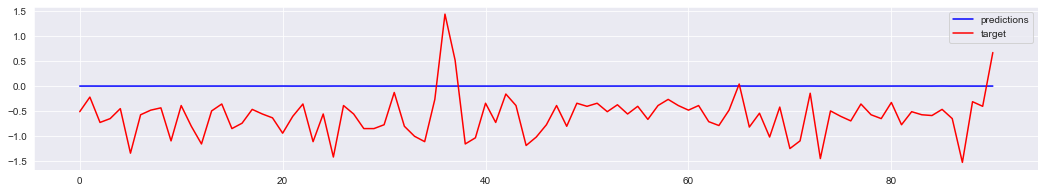

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
plt.plot(y_pred, c='blue', label="predictions")
plt.plot(y_test, c='red', label="target")
plt.legend(loc="upper right")
plt.show()

ValueError: x, y, and format string must not be None

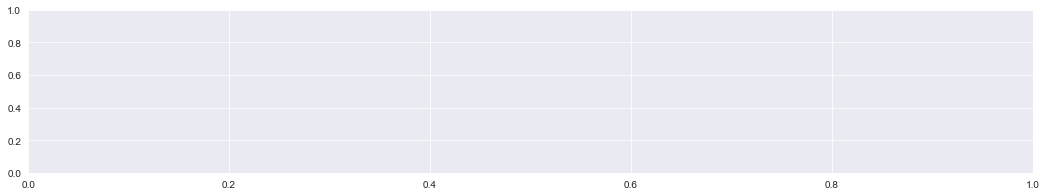

In [29]:
plt.figure(figsize=(18,3))
plt.plot(kreg.loss, c='red')
plt.show()